# Data Import and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
X=df['YearsExperience']
y=np.reshape(df['Salary'],(30,1))
X=np.reshape(X,(-1,1))
X=np.hstack((np.ones((X.shape[0],1)),X))
np.shape(X),np.shape(y)

((30, 2), (30, 1))

# Method 1: Using Direct Formula

Numerical Method:   
We know that in Linear Regression We try to minimise cost function
Mehtod 1 is directly using formula and I am attaching proof with it.
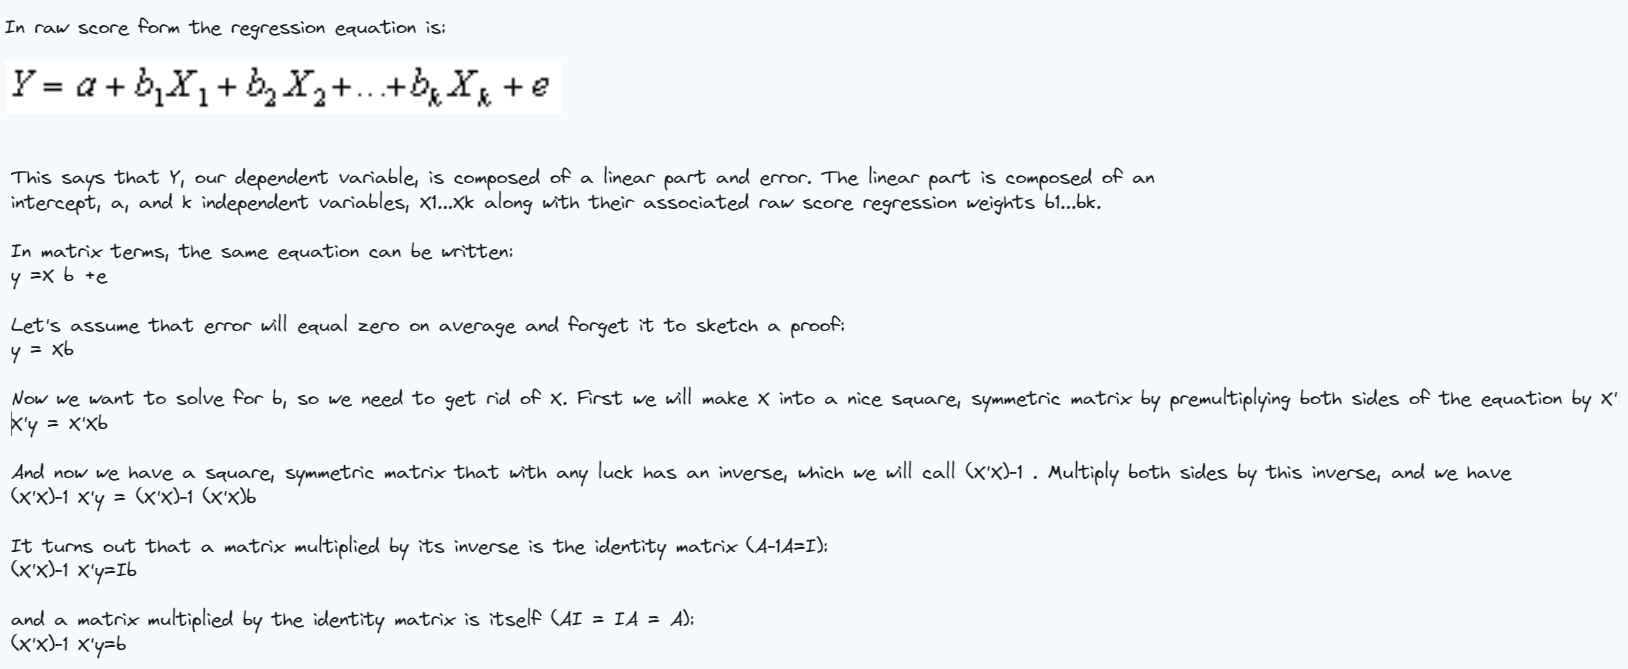

Here is [calculus]('https://www.youtube.com/watch?v=fBaXhzlSO18&ab_channel=Stats4Everyone') Based Proof

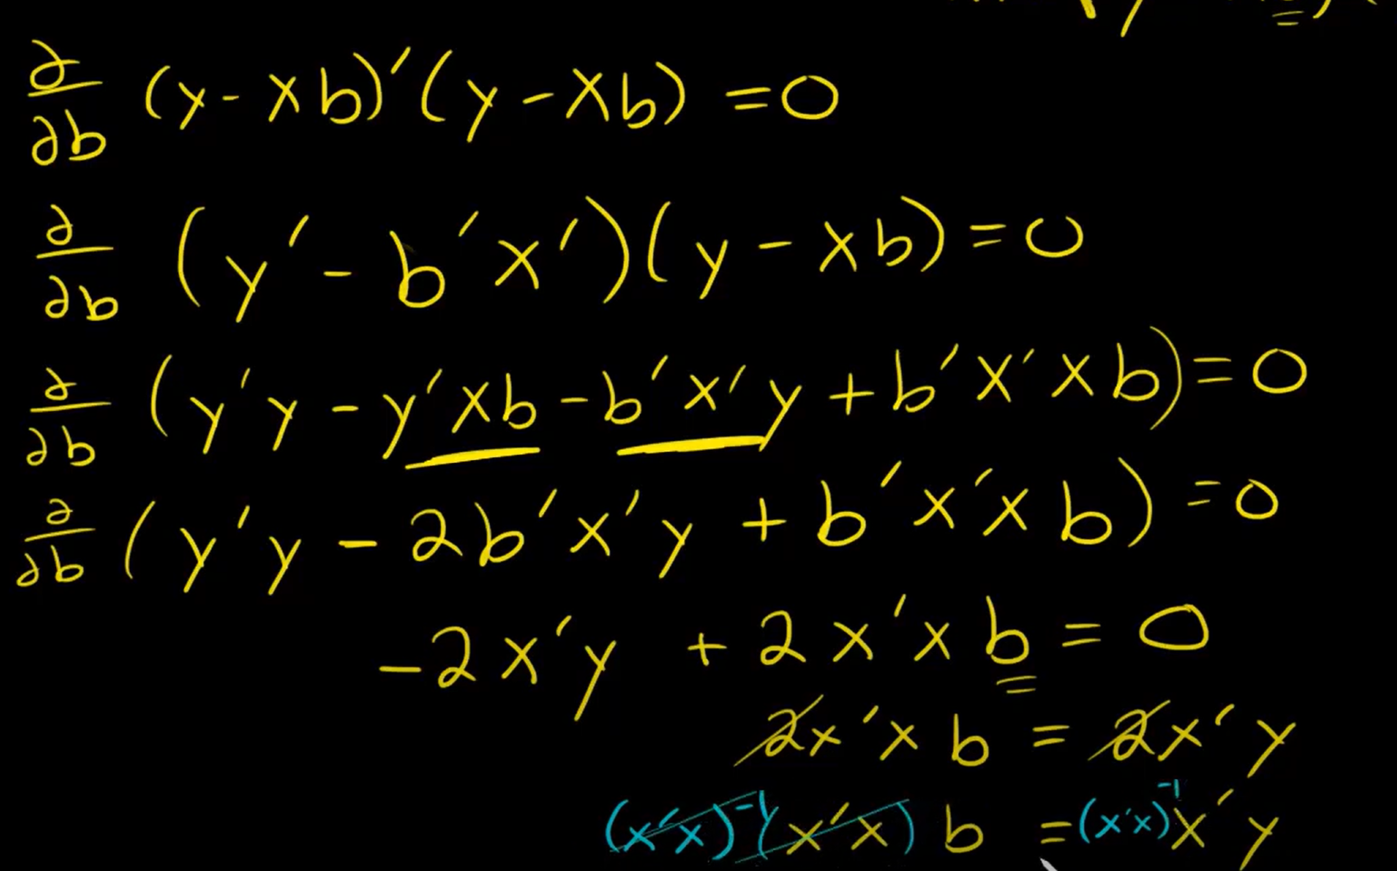

Text(0.5, 1.0, 'Method 1')

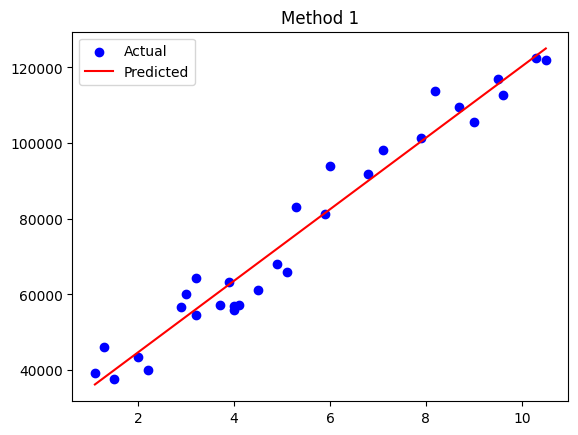

In [40]:
def linear_reg1(X, y):
    return np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y

c,m=linear_reg1(X,y)
y_pred = X[:, 1] * m + c
X_=df['YearsExperience']
plt.scatter(X_,y,color='blue',label='Actual')
plt.plot(X_,y_pred,color='red',label='Predicted')
plt.legend()
plt.title('Method 1')

Time Complexity: O(n³)
Read more: [Matrix Inverse](https://medium.com/@fernando.dijkinga/matrix-inversion-a-fundamental-operation-in-scientific-computing-8217197a0e48)

# Method 2: Gradient Descent

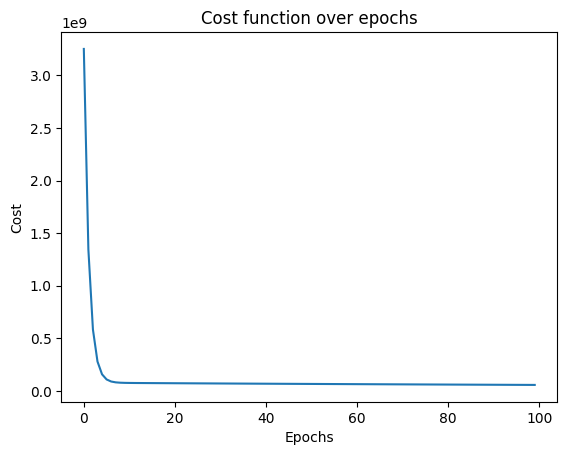

Theta (parameters): [[ 6481.91749872]
 [12315.52743012]]


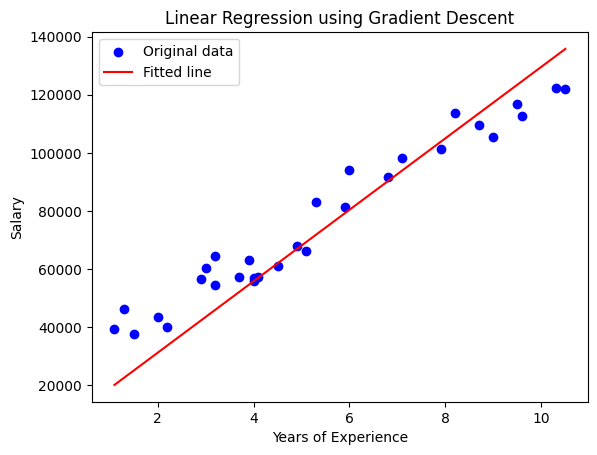

In [38]:
def linreg2(x, y, alpha, epochs):
    m = len(y)
    theta = np.zeros((x.shape[1], 1))
    cost = []

    for i in range(epochs):
        h = np.dot(x, theta)  # predicted output
        J = (1/(2*m)) * np.sum(np.square(h - y))  # cost function
        d_theta = (1/m) * np.dot(x.T, h - y)  # gradient
        theta = theta - alpha * d_theta  # update parameters
        cost.append(J)  # store cost

    plt.plot(range(epochs), cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost function over epochs')
    plt.show()
    return theta, cost

# Preparing the data
X = df['YearsExperience'].values
y = df['Salary'].values
y = np.reshape(y, (30, 1))
X = np.reshape(X, (-1, 1))
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Hyperparameters
alpha = 0.01  # learning rate
epochs = 100  # number of iterations

# Training the model
theta, cost = linreg2(X, y, alpha, epochs)
print("Theta (parameters):", theta)

# Predictions
y_pred = np.dot(X, theta)

# Plotting the results
X_ = df['YearsExperience'].values
plt.scatter(X_, y, color='blue', label='Original data')
plt.plot(X_, y_pred, color='red', label='Fitted line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

Time Complexity: O(epochs*mn), where epochs epochs is the number of iterations,
m is the number of training examples, and n is the number of features (including the intercept term)

# Using Sci-Kit Learn Library

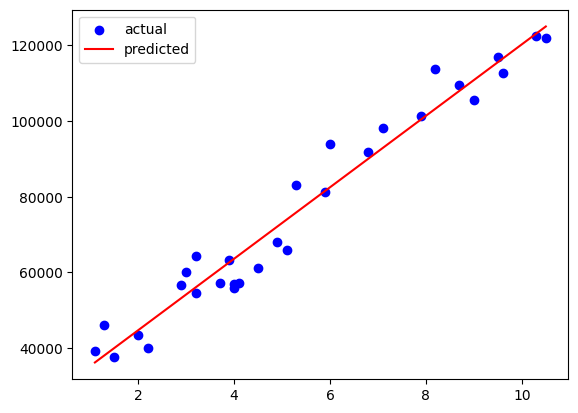

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(X)
plt.scatter(X_,y,color='blue',label='actual')
plt.plot(X_,y_pred,color='red',label='predicted')
plt.legend()